# 1 Author

**Student Name**: Chan King Ning

**Student ID**: 230509074

# 2 Problem formulation

For the basic part, I will solve a classification problem to classify the images of 'rice' and 'chips'. The interesting part is that in order to make classification, I need to perform feature extraction from images and extract important and special features for images of 'rice' and 'chips'. This project has important applications such as food images classification could help users by tracking their diet in food identification app.

# 3 Machine Learning pipeline

My machine learning pipeline consists of four stages: Input, Transformation, Modeling and Output.

1. Input: The input will be food images for 'rice' and 'chips'.
2. Transformation: I will transform these images by extracting different useful features such as colour, shape and texture.
3. Modeling: Different machine learning models will be used on these features such as LinearSVC, RandomForestClassifier, and SVM.
4. Output: The output of the pipeline is the predicted class ('rice' or 'chips') for each image.

# 4 Transformation stage

In the transformation stage, I have extracted the yellow components of the images, texture features using GLCM and shape features as feature extraction.
1. Yellow components: This function calculates the amount of yellow colour in the image. I choose this feature because 'chips' have more yellow colour than 'rice' due to frying.
2. Shape feature: This function calculates the average aspect ratio of objects in the image. 'Rice' and 'chips' have different shapes - rice are more elongated and chips are generally more round or irregular. Therefore, the aspect ratio could help to make image classification.
3. Texture features: This function calculates several texture features from the image. The texture of ‘rice’ and ‘chips’ are different - chips have a more rough or irregular texture due to frying and seasoning, while rice has a more smooth and uniform texture. These texture features can therefore help distinguish between ‘rice’ and ‘chips’.

# 5 Modelling

I have used 3 machine learning models for the project.
1. Linear Support Vector Classifier (LinearSVC): This model is a type of Support Vector Machine (SVM) with a linear kernel. It’s chosen because it’s effective in high dimensional spaces and best suited for binary classification problems. The parameter C=10 controls the penalty for misclassification, with a higher value leading to less tolerance for misclassification.
2. Random Forest Classifier: This model is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes of the individual trees. It’s chosen because it’s robust to overfitting, can handle large datasets with high dimensionality, and provides importance scores for features. The parameters n_estimators=5 and max_depth=3 control the number of trees in the forest and the maximum depth of the trees, respectively.
3. Support Vector Classifier (SVC) with Radial Basis Function (RBF) Kernel: This model is another type of SVM, but with a non-linear RBF kernel. It’s chosen because it can handle non-linear decision boundaries. The class_weight='balanced' parameter helps to adjust weights inversely proportional to class frequencies in the input data, which is useful for imbalanced datasets.

# 6 Methodology

I trained these 3 models using the training dataset X_train_fn and Y_train. X_train_fn is the feature matrix from training set by extacting different features from each image. Y_train is the target vector for the training set. It contains the labels for each image in your training set.

I used accuracy and confusion matrix to evaluate the performance of the models.

- Accuracy: I calculated the training and test accuracy by comparing the predicted labels with the actual labels. Accuracy is the proportion of correct predictions over total predictions.
- Confusion Matrix: I created a confusion matrix for each model to visualize the performance of the classification model.

# 7 Dataset

In [ ]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


First, I download all images from github.  

In [ ]:
import mlend
from mlend import download_yummy, yummy_load

subset = {}

datadir = download_yummy(save_to = '/content/drive/MyDrive/Data_miniproject/MLEnd', subset = subset,verbose=1,overwrite=False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [ ]:
os.listdir(datadir)

['MLEndYD_images', 'MLEndYD_image_attributes_benchmark.csv']

In [ ]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data_miniproject/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [ ]:
sample_path = '/content/drive/MyDrive/Data_miniproject/MLEnd/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

3250

There are total 3250 images.

As we are interested in the images of dish that has either rice or chips, I will set the conditions below:


In [ ]:
def check_ingredients(row):

  if 'rice' in row['Ingredients'] and 'chips' in row['Ingredients']:
    return 'delete'
  elif 'rice' in row['Dish_name'] and 'chips' in row['Dish_name']:
    return 'delete'
  elif 'rice' in row['Ingredients'] and 'chips' in row['Dish_name']:
    return 'delete'
  elif 'chips' in row['Ingredients'] and 'rice' in row['Dish_name']:
    return 'delete'
  elif 'rice' in row['Ingredients'] and 'rice' in row['Dish_name']:
    return 'rice'
  elif 'chips' in row['Ingredients'] and 'chips' in row['Dish_name']:
    return 'chips'
  elif 'rice' in row['Ingredients'] or 'rice' in row['Dish_name']:
    return 'rice'
  elif 'chips' in row['Ingredients'] or 'chips' in row['Dish_name']:
    return 'chips'
  else:
    return None


MLENDYD_df['rice_chips'] = MLENDYD_df.apply(check_ingredients, axis=1)
MLENDYD_df = MLENDYD_df[MLENDYD_df['rice_chips'] != 'delete']
MLENDYD_df = MLENDYD_df.dropna(subset=['rice_chips'])


In [ ]:
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,rice_chips
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,rice
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,rice
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,rice
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,rice
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,rice
...,...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test,rice
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test,rice
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train,rice


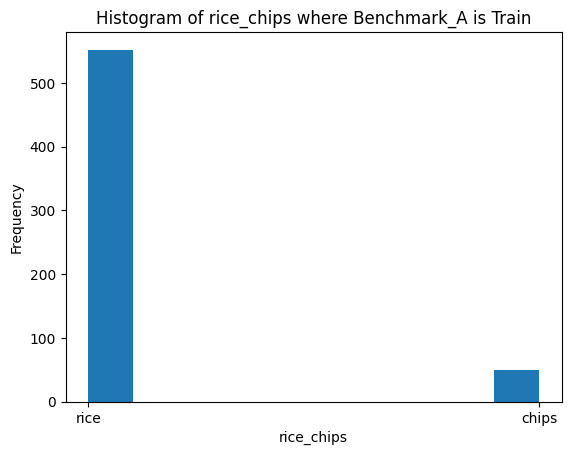

In [ ]:
plt.hist(MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Train']['rice_chips'])

plt.title('Histogram of rice_chips where Benchmark_A is Train')
plt.xlabel('rice_chips')
plt.ylabel('Frequency')

plt.show()

From the histogram, we can see that in training set, the frequency of 'rice' and 'chips' images are imbalanced. Therefore in later section of model training, I need to set class_weight='balanced' to adjust the weight of the classes and avoid poor performance of minority class (Chips).

Now, I will label 'rice' and 'chips'.
- Class 0 for 'chips'
- Class 1 for 'rice'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded_labels = le.fit_transform(MLENDYD_df['rice_chips'])

MLENDYD_df['rice_chips_encoded'] = encoded_labels


In [ ]:
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,rice_chips,rice_chips_encoded
filename,,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,rice,1
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,rice,1
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,rice,1
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,rice,1
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,rice,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test,rice,1
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test,rice,1
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train,rice,1


Based on the Benchmark_A, I will separate the dataset into TrainSet and TestSet.

Now, I will create TrainSet and TestSet and both consists of X_paths, Y and Y_encoded and the mapping for 'rice' and 'chips'.

In [ ]:
TrainSet = {}
TestSet = {}

TrainSet['Y'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Train', 'rice_chips'].values
TestSet['Y'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Test', 'rice_chips'].values

In [ ]:
print(TrainSet['Y'].shape)
print(TestSet['Y'].shape)

(602,)
(269,)


In [ ]:
TrainSet['Y']

array(['rice', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'chips', 'chips', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'chips', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'chips', 'rice', 'rice', 'rice', 'rice', 'rice',
       'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'chips', 'chips', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'chips', 'rice', 'rice', 'rice', 'rice', 'rice', '

In [ ]:
TrainSet['Y_encoded'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Train', 'rice_chips_encoded'].values
TestSet['Y_encoded'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Test', 'rice_chips_encoded'].values

In [ ]:
print(TrainSet['Y_encoded'].shape)
print(TestSet['Y_encoded'].shape)

(602,)
(269,)


In [ ]:
TrainSet['Y_encoded']

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
MAPs = {'Rice_Chips': dict(zip(le.classes_, le.transform(le.classes_)))}

In [ ]:
MAPs

{'Rice_Chips': {'chips': 0, 'rice': 1}}

In [ ]:
train_filenames = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Train'].index.tolist()
test_filenames = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Test'].index.tolist()

In [ ]:
image_dr = '/content/drive/MyDrive/Data_miniproject/MLEnd/yummy/MLEndYD_images/'
image_paths = [os.path.join(image_dr, filename) for filename in MLENDYD_df.index]

In [ ]:
len(image_paths)

871

In [ ]:
TrainSet['X_paths'] = [path for path in image_paths if os.path.basename(path) in train_filenames]
TestSet['X_paths'] = [path for path in image_paths if os.path.basename(path) in test_filenames]

In [ ]:
print(len(TrainSet['X_paths']))
print(len(TestSet['X_paths']))

602
269


In [ ]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

# Resizing images

As images are not of the same size, we need to resize them so that they have the same size. To keep the aspect ratio of image as it is, we will append black color to make so that images are squared and then we will resize them to 200x200 pixels.

In [ ]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [ ]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|602\602|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|269\269|
Done!


((602, 200, 200, 3), (269, 200, 200, 3))

# Feature Extraction

In this section, we will do some experiments. For the first try, we will include the features appeared in the Starter_Kit Notebook which extract yellow components and texture features from the images.

Using a 200 x 200 pixels photo as the predictor, we need to start considering its dimensionality. Each photo is described by 3 x 200 x 200 = 120,000 values. Therefore, the predictor space has 120,000 dimensions. To train a model on such a space, we need a training dataset that has more than 120,000 samples. But we do not have such a large dataset.

Therefore, we need to reduce the dimensionality of the predictor space, in other words, we will move our samples from a 120,000D space to another space with fewer dimensions.

In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [ ]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

In [ ]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((602, 3), (269, 3))

Note that X_train_f represents a collection of 602 samples described by 3 attributes and X_test_f represent a collection of 269 samples described by 3 attributes. This feature extraction stage has reduced the dimensionality of our problem from 120,000D to 3D.

# Normalisation

In addition to reducing the dimensionality of the prediction space, let's implement a normalisation stage to ensure that the 3 attributes in the new prediction space take on a similar range of values.

In [ ]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

In [ ]:
print(X_train_fn.shape)
print(X_test_fn.shape)

(602, 3)
(269, 3)


Now, we will perform 3 machine learning models and evaluate their performance: Linear Support Vector Classifier, Random Forest Classifier and Support Vector Machines - Support Vector Classifier.

# 8 Results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=10)
model.fit(X_train_fn, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LinearSVC(C=10)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.9169435215946844
Test  Accuracy:	 0.9219330855018587


We could see that the training accuracy is around 92% and test accuracy is 92%. The accuracy is very high. Let's check the confusion matrix to see if it really did that well.

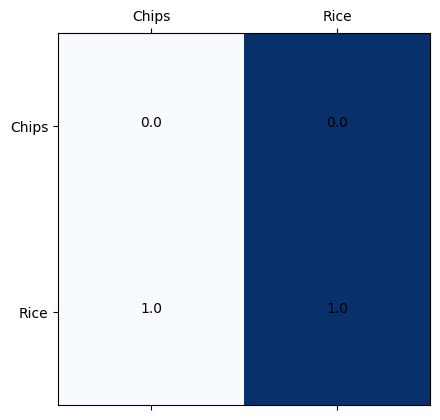

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Although we can see that the model performs perfectly on ‘Rice’ images but it performs bad on 'Chips' images.

In [ ]:
model = RandomForestClassifier(n_estimators=5,max_depth=3,class_weight='balanced')
model.fit(X_train_fn, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=5)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6810631229235881
Test  Accuracy:	 0.6171003717472119


For Random Forest Classifier, we could see that training accuracy is about 68% and test accuracy is around 62%.

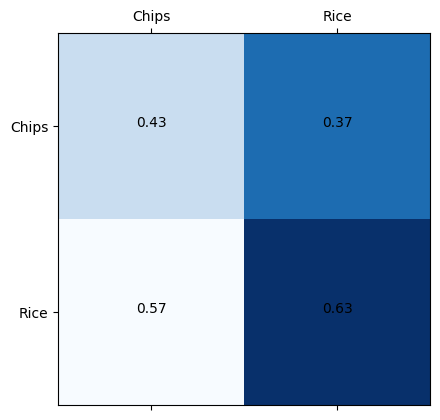

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

From confusion matrix, we could see that the model correctly predicted 43% of ‘Chips’ images and the model correctly predicted 63% of ‘Rice’ images.

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf', class_weight='balanced')

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

In [ ]:
train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.4634551495016611
Test  Accuracy:	 0.379182156133829


For svm.SVC, the training accuracy is approximately 46% and test accuracy is around 38%.

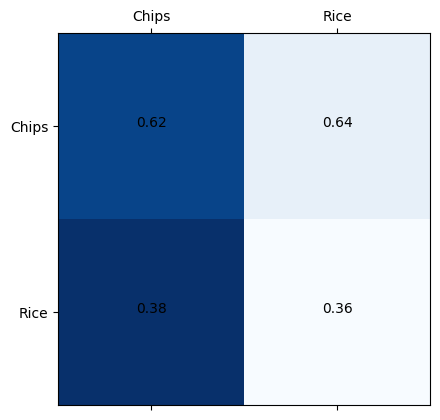

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

From the confusion matrix, we could see that the model correctly predicted 62% of ‘Chips’ images and the model correctly predicted 36% of ‘Rice’ images. It shows that the model is better at predicting 'chips' than 'rice'. But still, there are significant amount of misclassifications. For example, when the actual is 'rice', the model predicts it as 'chips' for 64%.

In conclusion, although the LinearSVC model had the highest accuracy, it did not perform well on the ‘Chips’ class. The Random Forest Classifier performed slightly better on the 'Rice' images and smv.SVC has the lowest accuracy and did not do well on performing 'Rice' images.

In order to make improvement, I would like to do another experiment to the model by adding new feature. Shape is an important factor. Rice and chips have different shapes and let see if the model's performance is improved or not.

Since LinearSVC is not able to classify any 'Chips' images, I will only use Random Forest Classifier and svm.SVC for the second experiment and evaluate their performance.

In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage.segmentation import slic


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def get_shape_features(I):

  segments = slic(I, n_segments=100, compactness=10)
  props = regionprops(segments)
  aspect_ratios = [prop.major_axis_length / prop.minor_axis_length for prop in props]
  return np.mean(aspect_ratios)

def get_texture_features(I):

  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
  dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
  correlation = graycoprops(glcm, 'correlation')[0, 0]
  return dissimilarity, correlation

def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [ ]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2 = get_shape_features(I)
  f3,f4 = get_texture_features(I)
  X_train_f.append([f1,f2,f3,f4])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2 = get_shape_features(I)
  f3,f4 = get_texture_features(I)
  X_test_f.append([f1,f2,f3,f4])

In [ ]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((602, 4), (269, 4))

In [ ]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

In [ ]:
print(X_train_fn.shape)
print(X_test_fn.shape)

(602, 4)
(269, 4)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = RandomForestClassifier(n_estimators=5,max_depth=3,class_weight='balanced')
model.fit(X_train_fn, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=5)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.8305647840531561
Test  Accuracy:	 0.8066914498141264


The training accuracy is around 83% and test accuracy is approximately 81%. The model's performance has improved.

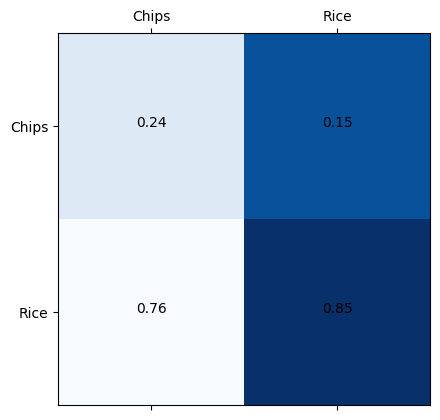

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

From the confusion matrix, we could see that the model correctly predicted 24% of ‘Chips’ images and the model correctly predicted 85% of ‘Rice’ images. Besides, there is a significant amount of classification of 76% when the actual is 'Chips' and the model predicts it as 'Rice'.

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf', class_weight='balanced')

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

In [ ]:
train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.5598006644518272
Test  Accuracy:	 0.4721189591078067


For svm.SVC, the training accuracy is around 56% and test accuracy is 47%. The model's performance has improved.

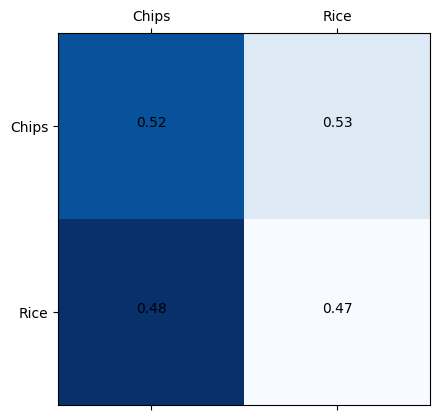

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

For the confusion matrix, we could see that the model correctly predicted 52% of ‘Chips’ images and the model correctly predicted 47% of ‘Rice’ images.

# Small conclusion from results

In terms of accuracy, we could see that by adding shape feature to the model, both Random Forest Classifier and svm.SVC model's performance has improved.

For the Random Forest Classifier, the training accuracy increased from 68.11% to 83.06%, and the test accuracy increased from 61.71% to 80.67%.

For the svm.SVC model, the training accuracy increased from 46.35% to 55.98%, and the test accuracy increased from 37.92% to 47.21%.

This suggests that the shape features provided additional helpful information that helped the models to better distinguish between ‘rice’ and ‘chips’ images.

In terms of confusion matrix, it shows that there is still room of improvements.

For the Random Forest Classifier, the model correct prediction on 'Chips' images decreases from 43% to 24% and the model correction prediction on 'Rice' images increases from 63% to 85%.

For svm.SVC model, the model correct prediction on 'Chips' images decreases from 62% to 52% and the model correction prediction on 'Rice' images increases from 36% to 47%.

Therefore, we could conclude that shape feature is more informative for 'Rice' class than 'Chips' class. One reason behind is that most rice have distinct shape but chips can have different shapes like triangle, round, square or irregular etc.

# 9 Conclusions

In conclusion, I have performed two experiments for image classification. It is noticed that adding shape feature could improve the model's general performance in terms of accuracy.

By comparing the accuracy of Random Forest Classifier and svm.SVC, we can see that Random Forest Classifier has a higher accuracy. However, when we evlauate the performance using both accuracy and confusion matrix, we could see that Random Forest Classifier is only good at predicting 'Rice' images but not performing well at predicting 'Chips' images. Therefore, if you ask me what is the best model for image classification for this project, I could not give you a specific answer. It depends on whether you want to predict 'Rice' images better or 'Chips' images better. If you want the former, I recommend you to choose Random Forest Classifier in experiment 2 with additional shape feature. If you want the latter, I recommend you to choose svm.SVC model in experiment 1 with no additional shape feature. However, it is suggested to do more trial and research in order to improve the model's performance at predicting 'Chips' images since it is not as high as that at predicting 'Rice' images.


Still, room of improvements is needed for this project. First, it is suggested to include more relevant features from the images, such as edge detection features, size features etc. Second, more machine learning models should be tried in order to improve the results. By improving the results, it can help users better at using the food identification app in reality.  
